In [64]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from pandas.plotting import autocorrelation_plot, lag_plot
from scipy.stats import skew, kurtosis, ks_2samp
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.tsa.arima.model import ARIMA
from itertools import combinations

## Data loading

In [79]:
challenge_data = pd.read_csv(r'challenge_data.csv')
given_data = pd.read_csv(r'given_data.csv')

In [80]:
data_dict = {'Challenge': {1: challenge_data['1'].values, 
                           2: challenge_data['2'].values}, 
             'Given': {'Real': given_data['Real'].values, 
                       'Generated': given_data['Generated'].values}}

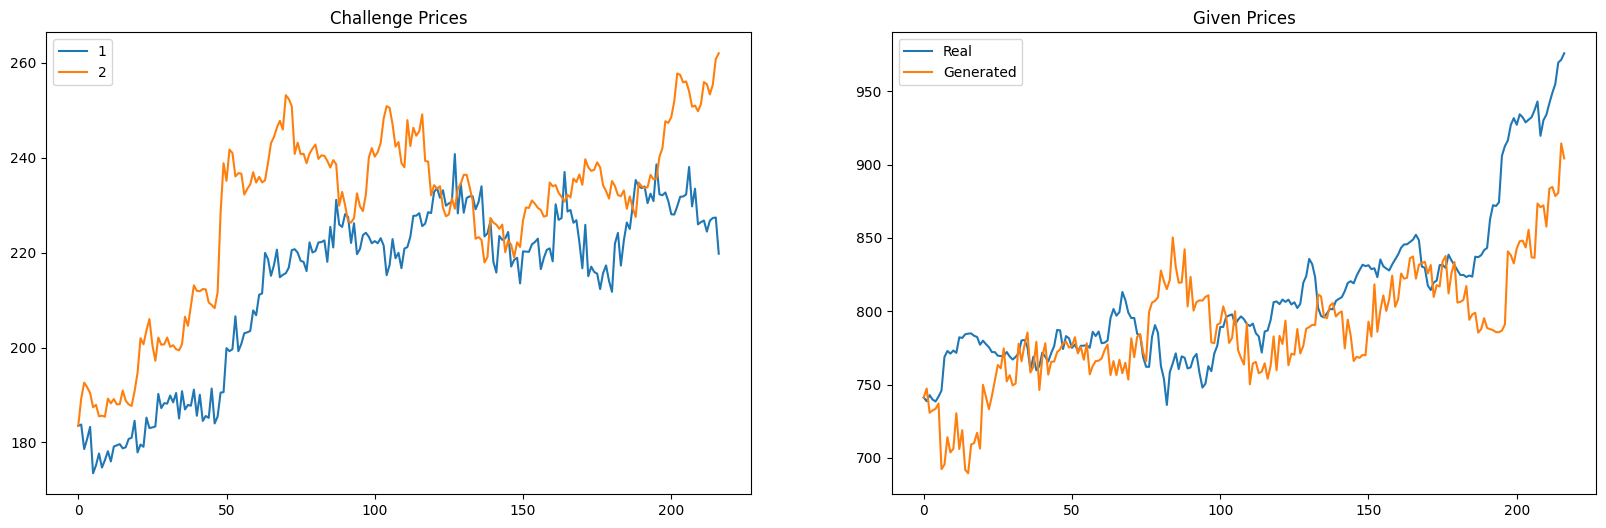

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
for idx, key in enumerate(data_dict): 
    for sample in data_dict[key]: 
        ax[idx].plot(data_dict[key][sample], label = sample)
    ax[idx].set_title(f'{key} Prices')
    ax[idx].legend()
plt.show()

### Summary Statistics

In [82]:
for idx, key in enumerate(data_dict):
    for sample in data_dict[key]: 
        print(f'{key} {sample}')
        print(f'    Mean: {data_dict[key][sample].mean()}')
        print(f'    Standard Deviation: {data_dict[key][sample].std(ddof = 1)}')
        print(f'    Skew: {skew(data_dict[key][sample])}')
        print(f'    Excess Kurtosis: {kurtosis(data_dict[key][sample], fisher = True)}')

Challenge 1
    Mean: 213.78594661825298
    Standard Deviation: 18.17835174683061
    Skew: -0.871586321118892
    Excess Kurtosis: -0.6473201893247649
Challenge 2
    Mean: 228.5226205391705
    Standard Deviation: 18.73592408293141
    Skew: -0.8471759967725121
    Excess Kurtosis: -0.0945805296926685
Given Real
    Mean: 809.8134551843318
    Standard Deviation: 51.47585699961434
    Skew: 1.4098120058648032
    Excess Kurtosis: 1.5710597679016054
Given Generated
    Mean: 788.1026363000194
    Standard Deviation: 39.570755815599234
    Skew: 0.18968644593975242
    Excess Kurtosis: 0.5970348611555822


## Compute Returns

In [83]:
returns_dict = defaultdict(dict)
for key in data_dict:
    for sample in data_dict[key]: 
        sample_prices = data_dict[key][sample]
        returns_dict[key][sample] = np.diff(sample_prices) / sample_prices[:-1]

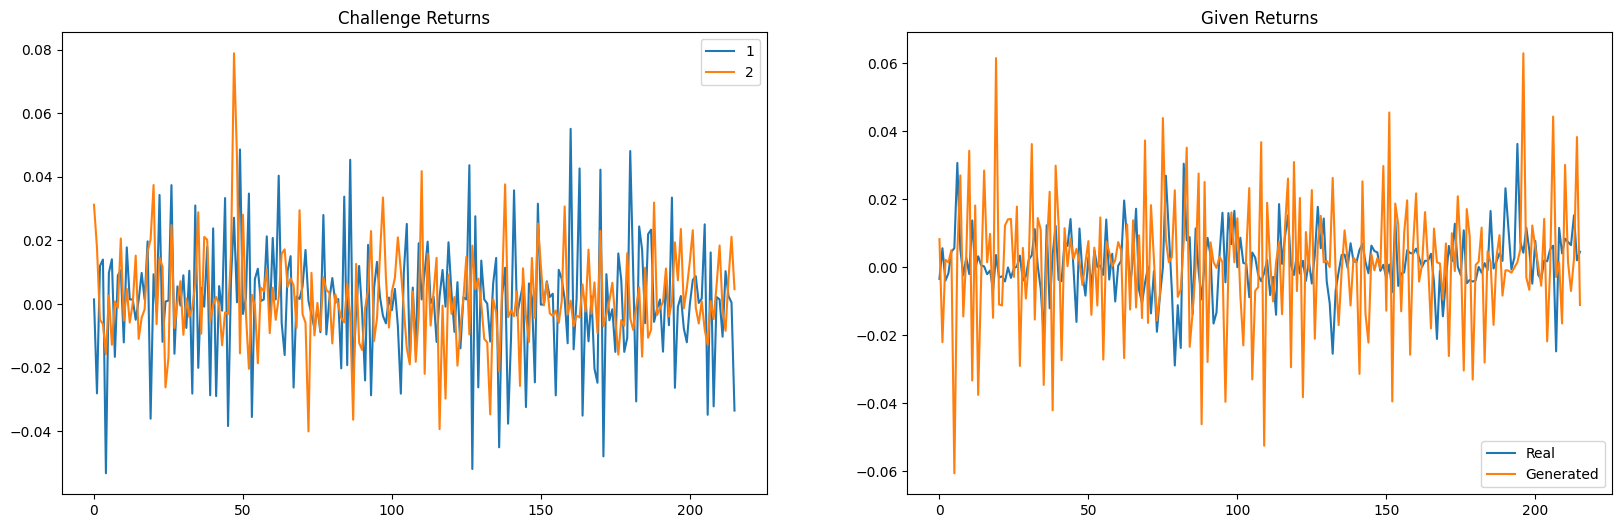

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
for idx, key in enumerate(returns_dict): 
    for sample in returns_dict[key]: 
        ax[idx].plot(returns_dict[key][sample], label = sample)
    ax[idx].set_title(f'{key} Returns')
    ax[idx].legend()
plt.show()

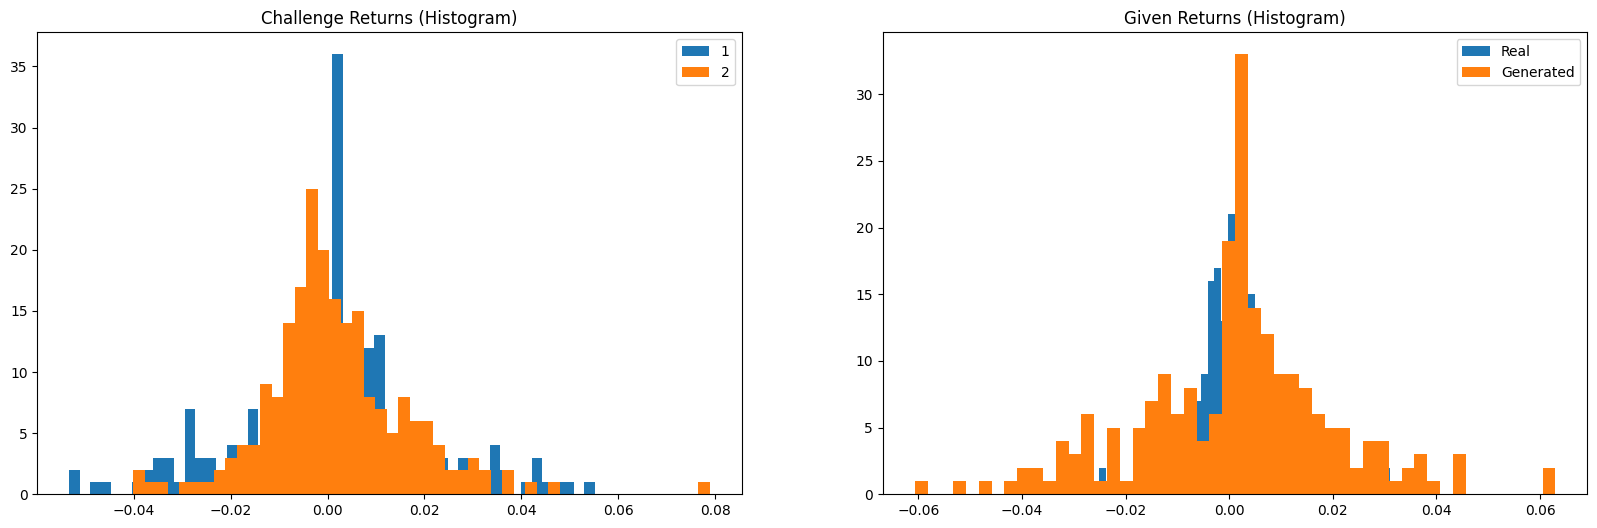

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
for idx, key in enumerate(returns_dict): 
    for sample in returns_dict[key]: 
        ax[idx].hist(returns_dict[key][sample], label = sample, bins = 50)
    ax[idx].set_title(f'{key} Returns (Histogram)')
    ax[idx].legend()
plt.show()

### Summary statistics

In [86]:
for idx, key in enumerate(returns_dict):
    for sample in returns_dict[key]: 
        print(f'{key} {sample}')
        print(f'    Mean: {returns_dict[key][sample].mean()}')
        print(f'    Standard Deviation: {returns_dict[key][sample].std(ddof = 1)}')
        print(f'    Skew: {skew(returns_dict[key][sample])}')
        print(f'    Excess Kurtosis: {kurtosis(returns_dict[key][sample], fisher = True)}')

Challenge 1
    Mean: 0.0010196758996441795
    Standard Deviation: 0.019261652945938783
    Skew: -0.06828077370446219
    Excess Kurtosis: 0.516124203987701
Challenge 2
    Mean: 0.001760038641505172
    Standard Deviation: 0.014957305871323389
    Skew: 0.7712884757308016
    Excess Kurtosis: 3.345768470579789
Given Real
    Mean: 0.0013169430520926075
    Standard Deviation: 0.009261184902439561
    Skew: 0.1424860963509801
    Excess Kurtosis: 2.1224234931386485
Given Generated
    Mean: 0.00110477307420734
    Standard Deviation: 0.01921803695990567
    Skew: -0.07830234956431
    Excess Kurtosis: 0.9443722196469508


### Returns: Autocorrelation

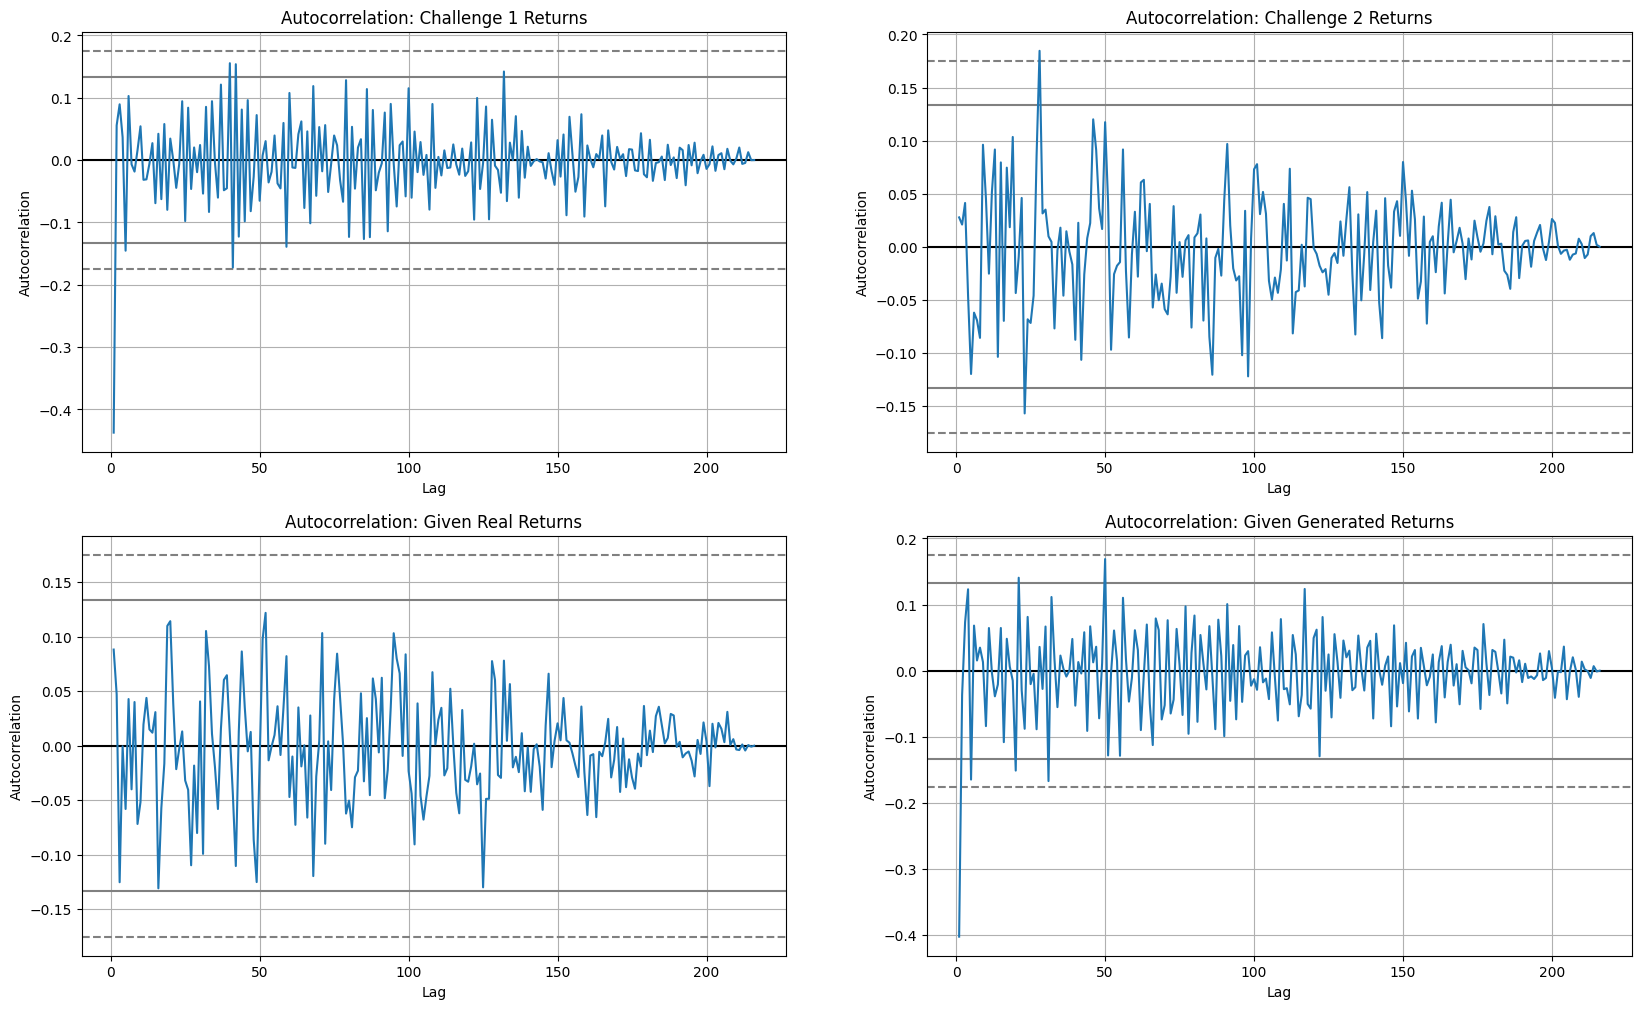

In [87]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
for idx, key in enumerate(returns_dict): 
    for jdx, sample in enumerate(returns_dict[key]): 
        autocorrelation_plot(returns_dict[key][sample], ax = ax[idx, jdx])
        ax[idx, jdx].set_title(f'Autocorrelation: {key} {sample} Returns')
plt.show()

### Returns: Lag plot

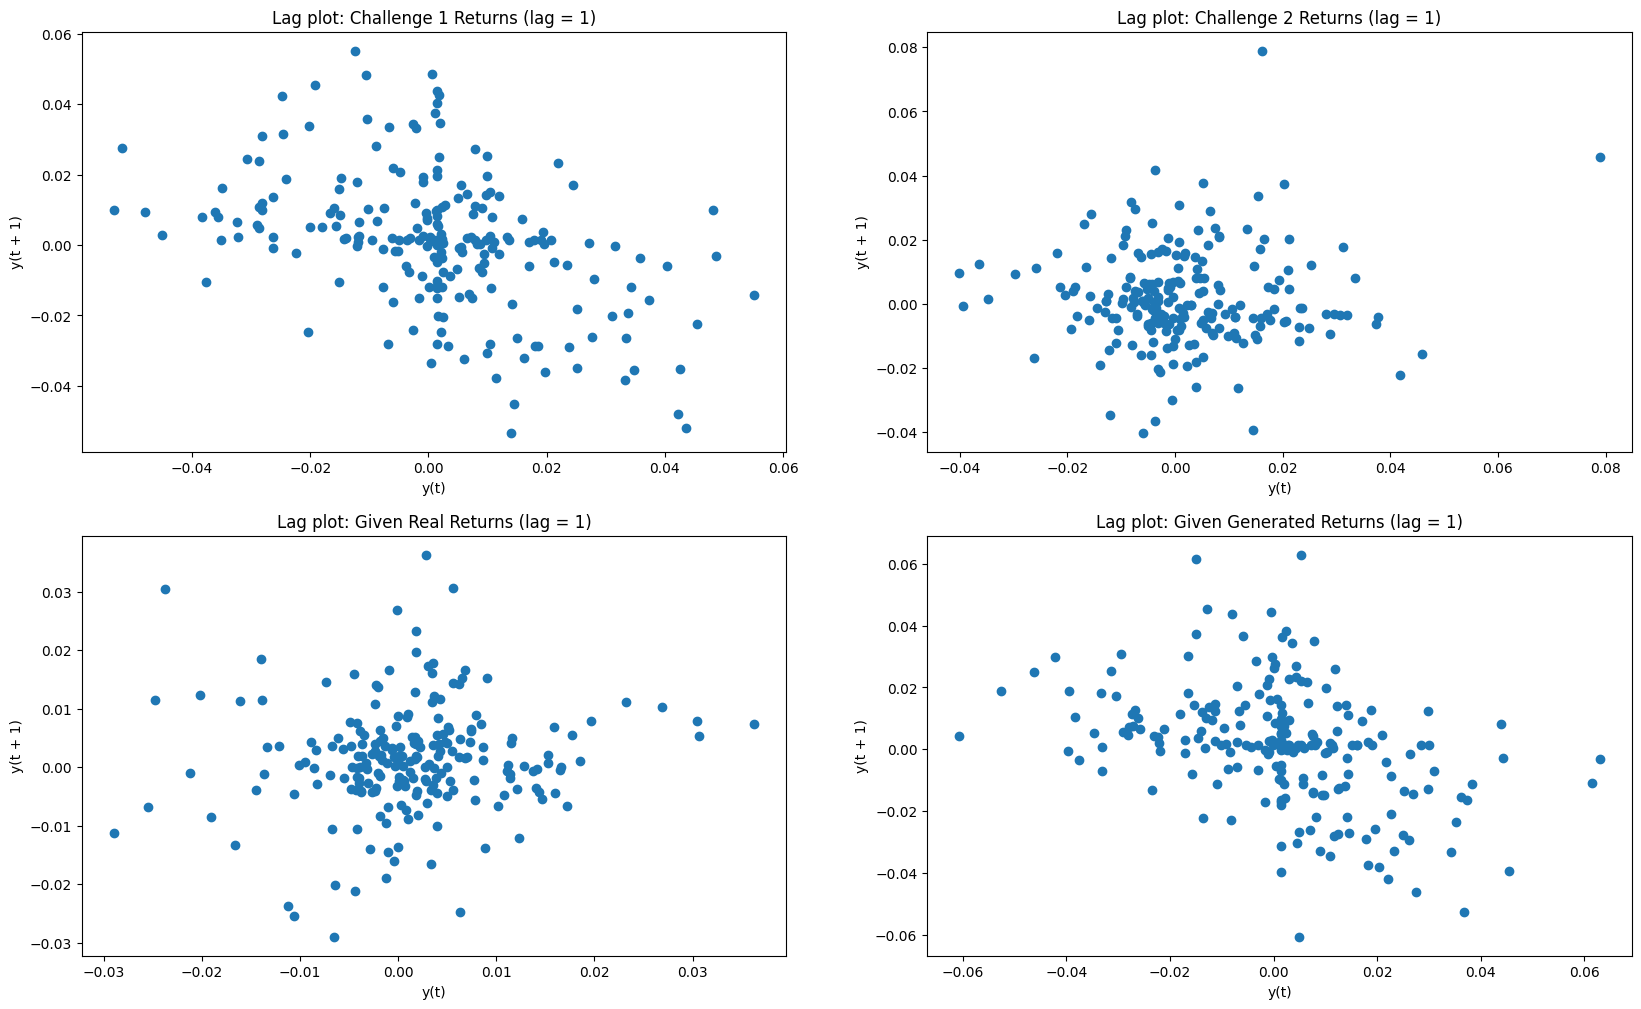

In [88]:
lag_value = 1
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
for idx, key in enumerate(returns_dict): 
    for jdx, sample in enumerate(returns_dict[key]): 
        lag_plot(pd.Series(returns_dict[key][sample]), ax = ax[idx, jdx], lag = lag_value)
        ax[idx, jdx].set_title(f'Lag plot: {key} {sample} Returns (lag = {lag_value})')
plt.show()

### Returns: Kolmogorov-Smirnov Test

In [89]:
multilevel_keys_dict = {f'{key} {subkey}': subvalue for key, value in returns_dict.items() for subkey, subvalue in value.items()}
all_pairs = list(combinations(list(multilevel_keys_dict), 2))


In [90]:
for pair in all_pairs:
    print(f'{pair[0]} vs {pair[1]}')
    print(f'    {ks_2samp(multilevel_keys_dict[pair[0]], multilevel_keys_dict[pair[1]])}')

Challenge 1 vs Challenge 2
    KstestResult(statistic=0.125, pvalue=0.06836657786714188, statistic_location=-0.0003275376575648838, statistic_sign=-1)
Challenge 1 vs Given Real
    KstestResult(statistic=0.1574074074074074, pvalue=0.009386316982676939, statistic_location=-0.00876679160452254, statistic_sign=1)
Challenge 1 vs Given Generated
    KstestResult(statistic=0.041666666666666664, pvalue=0.9922255280539376, statistic_location=0.0014268521688397344, statistic_sign=1)
Challenge 2 vs Given Real
    KstestResult(statistic=0.14814814814814814, pvalue=0.01735263633011186, statistic_location=-0.002967766906000105, statistic_sign=1)
Challenge 2 vs Given Generated
    KstestResult(statistic=0.1388888888888889, pvalue=0.03089073911425297, statistic_location=0.001040322007104929, statistic_sign=1)
Given Real vs Given Generated
    KstestResult(statistic=0.1712962962962963, pvalue=0.0034779467918426453, statistic_location=-0.006958219117953289, statistic_sign=-1)


### Returns: QQ-Plot

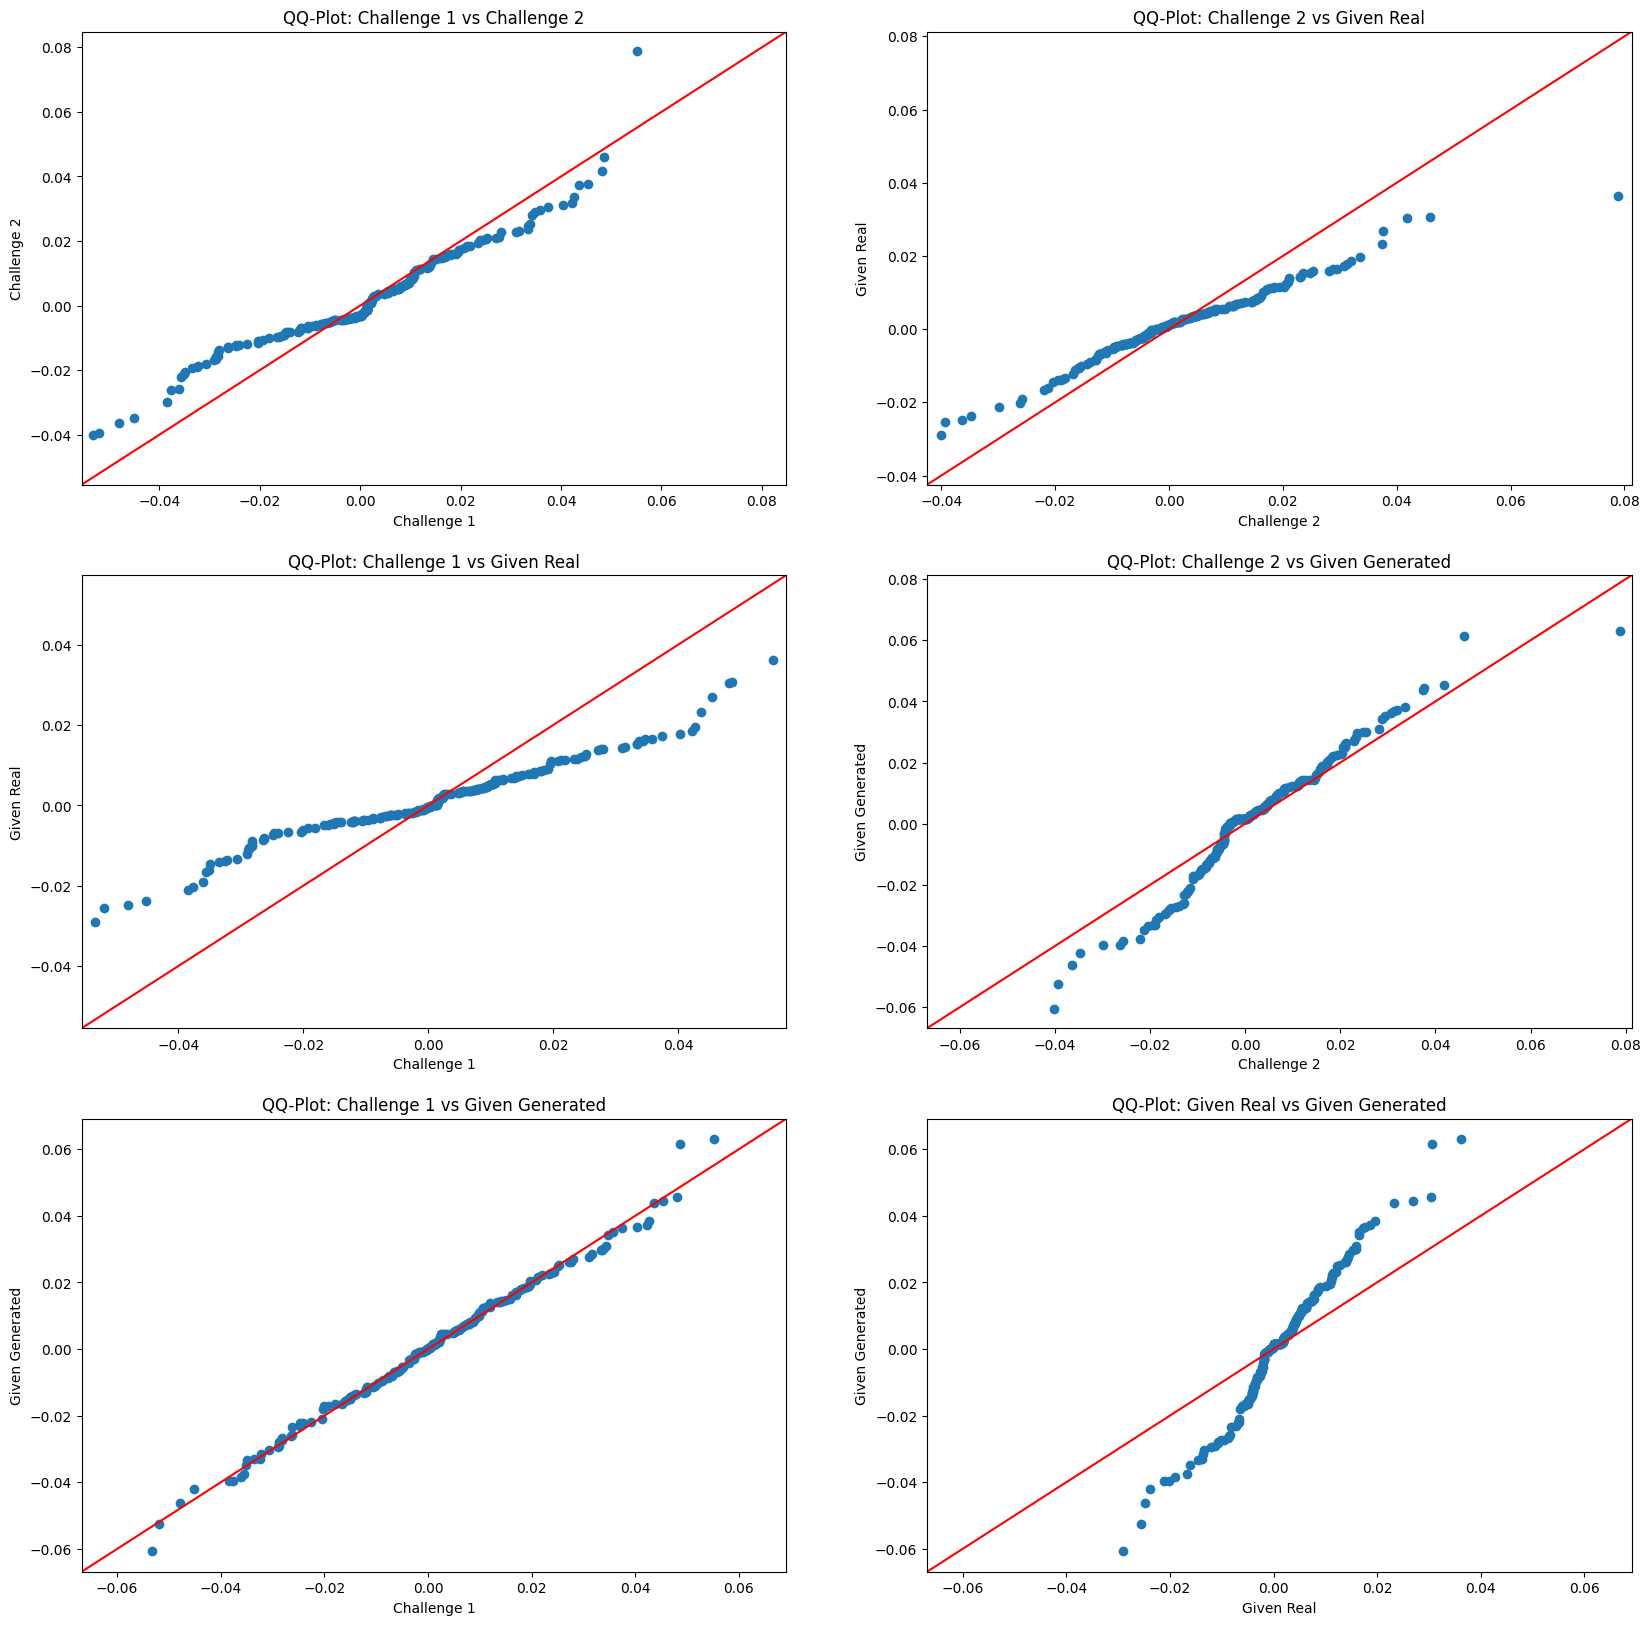

In [91]:
fig, ax = plt.subplots(3, 2, figsize = (20, 20))
i = 0
j = 0
for pair in all_pairs: 
    qqplot_2samples(multilevel_keys_dict[pair[0]], multilevel_keys_dict[pair[1]], ax = ax[i, j], xlabel = pair[0], ylabel = pair[1], line = '45')
    ax[i, j].set_title(f'QQ-Plot: {pair[0]} vs {pair[1]}')
    i += 1
    if i == 3: 
        i = 0
        j += 1
plt.show()